In [95]:
import pandas as pd
import matplotlib.pyplot as plt

# Data Discovery

In [97]:
bookings_data= pd.read_csv('Bookings.csv')
sessions_data= pd.read_csv('Sessions.csv')

In [98]:
bookings_data.head(5)

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05T16:12:08Z,Desktop,2565.28,MMT,1.0,10.0,747.8
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21T08:21:47Z,Android,23120.00,YATRA,1.0,1.0,6701.5
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16T22:54:58Z,Android,25717.60,YATRA,1.0,32.0,7712.0
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29T12:25:38Z,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11T16:09:10Z,Android,31791.20,GOIBIBO,1.0,3.0,6570.4


In [99]:
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        339 non-null    object 
 1   booking_id         339 non-null    object 
 2   from_city          339 non-null    object 
 3   from_country       339 non-null    object 
 4   to_city            339 non-null    object 
 5   to_country         339 non-null    object 
 6   booking_time       339 non-null    object 
 7   device_type_used   339 non-null    object 
 8   INR_Amount         339 non-null    float64
 9   service_name       339 non-null    object 
 10  no_of_passengers   339 non-null    float64
 11  days_to_departure  339 non-null    float64
 12  distance_km        339 non-null    float64
dtypes: float64(4), object(9)
memory usage: 34.6+ KB


In [100]:
bookings_data.shape

(339, 13)

In [101]:
bookings_data['booking_id'].nunique()

339

In [102]:
sessions_data.head(5)

,session_id,search_id,search_time,session_starting_time,booking_id
0,session_322,search_784,2020-01-21T21:35:38.910Z,2020-01-21T21:10:12Z,NaN
1,session_322,search_776,2020-01-21T21:37:37.697Z,2020-01-21T21:10:12Z,NaN
2,session_322,search_623,2020-01-21T21:36:11.392Z,2020-01-21T21:10:12Z,NaN
3,session_322,search_270,2020-01-21T21:16:07.685Z,2020-01-21T21:10:12Z,NaN
4,session_322,search_905,2020-01-21T21:34:55.673Z,2020-01-21T21:10:12Z,NaN


In [103]:
sessions_data.shape

(1497, 5)

In [104]:
sessions_data.duplicated().sum()

92

In [105]:
sessions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1497 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1497 non-null   object
 1   search_id              1497 non-null   object
 2   search_time            1497 non-null   object
 3   session_starting_time  1497 non-null   object
 4   booking_id             366 non-null    object
dtypes: object(5)
memory usage: 58.6+ KB


In [106]:
sessions_data['booking_id'].nunique()

338

# Data Cleaning

### 1. Check for duplicates

In [109]:
bookings_data.duplicated().sum()


0

In [110]:
sessions_data.duplicated().sum()


92

In [111]:
# Drop duplicate rows from the sessions_data dataframe, keeping the first occurrence
sessions_data_cleaned = sessions_data.drop_duplicates() 
sessions_data_cleaned.shape

(1405, 5)

### 2. Check for missing values

In [113]:
bookings_data.isna().sum()

customer_id          0
booking_id           0
from_city            0
from_country         0
to_city              0
to_country           0
booking_time         0
device_type_used     0
INR_Amount           0
service_name         0
no_of_passengers     0
days_to_departure    0
distance_km          0
dtype: int64

In [114]:
sessions_data_cleaned.isnull().sum()

session_id                  0
search_id                   0
search_time                 0
session_starting_time       0
booking_id               1066
dtype: int64

In [115]:
sessions_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   session_id             1405 non-null   object
 1   search_id              1405 non-null   object
 2   search_time            1405 non-null   object
 3   session_starting_time  1405 non-null   object
 4   booking_id             339 non-null    object
dtypes: object(5)
memory usage: 65.9+ KB


### 3. Check for datatype

In [117]:
bookings_data['booking_time']= pd.to_datetime(bookings_data['booking_time'])

In [118]:
sessions_data_cleaned['search_time'] = pd.to_datetime(sessions_data_cleaned['search_time'], format='ISO8601', errors='coerce')
sessions_data_cleaned['session_starting_time'] = pd.to_datetime(sessions_data_cleaned['session_starting_time'], format='ISO8601', errors='coerce')


C:\Users\user\AppData\Local\Temp\ipykernel_20736\711413931.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_data_cleaned['search_time'] = pd.to_datetime(sessions_data_cleaned['search_time'], format='ISO8601', errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_20736\711413931.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sessions_data_cleaned['session_starting_time'] = pd.to_datetime(sessions_data_cleaned['session_starting_time'], format='ISO8601', errors='coerce')


In [119]:
bookings_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 339 entries, 0 to 338
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype              
---  ------             --------------  -----              
 0   customer_id        339 non-null    object             
 1   booking_id         339 non-null    object             
 2   from_city          339 non-null    object             
 3   from_country       339 non-null    object             
 4   to_city            339 non-null    object             
 5   to_country         339 non-null    object             
 6   booking_time       339 non-null    datetime64[ns, UTC]
 7   device_type_used   339 non-null    object             
 8   INR_Amount         339 non-null    float64            
 9   service_name       339 non-null    object             
 10  no_of_passengers   339 non-null    float64            
 11  days_to_departure  339 non-null    float64            
 12  distance_km        339 non-null    float64        

In [120]:
sessions_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1405 entries, 0 to 1496
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   session_id             1405 non-null   object             
 1   search_id              1405 non-null   object             
 2   search_time            1405 non-null   datetime64[ns, UTC]
 3   session_starting_time  1405 non-null   datetime64[ns, UTC]
 4   booking_id             339 non-null    object             
dtypes: datetime64[ns, UTC](2), object(3)
memory usage: 65.9+ KB


# Data Analysis

### Merge two dataframes to a single dataframe

In [123]:
book_session_data = pd.merge(bookings_data, sessions_data_cleaned, on ='booking_id', how= 'left')
book_session_data.shape

(340, 17)

In [124]:
book_session_data['booking_id'].nunique()

339

In [125]:
book_session_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   customer_id            340 non-null    object             
 1   booking_id             340 non-null    object             
 2   from_city              340 non-null    object             
 3   from_country           340 non-null    object             
 4   to_city                340 non-null    object             
 5   to_country             340 non-null    object             
 6   booking_time           340 non-null    datetime64[ns, UTC]
 7   device_type_used       340 non-null    object             
 8   INR_Amount             340 non-null    float64            
 9   service_name           340 non-null    object             
 10  no_of_passengers       340 non-null    float64            
 11  days_to_departure      340 non-null    float64            

In [126]:
book_session_data[book_session_data.isnull().any(axis=1)] # there is one row that has no session details but has one booking

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time
47,customer_109,booking_114,Jaipur,India,Mumbai,India,2019-12-10 09:57:11+00:00,Desktop,10894.4,GOIBIBO,1.0,13.0,921.8,NaN,NaN,NaT,NaT


### 1. Find the number of distinct bookings, sessions, and searches from the given data sets.

In [128]:
# Count distinct bookings from bookings_data
distinct_bookings = bookings_data['booking_id'].nunique()

# Count distinct sessions and searches from sessions_data
distinct_sessions = sessions_data_cleaned['session_id'].nunique()
distinct_searches = sessions_data_cleaned['search_id'].nunique()

print(f"Number of distinct bookings: {distinct_bookings}")
print(f"Number of distinct sessions: {distinct_sessions}")
print(f"Number of distinct searches: {distinct_searches}")


Number of distinct bookings: 339
Number of distinct sessions: 331
Number of distinct searches: 1360


### 2. How many sessions have more than one booking?

In [130]:
book_session_data.groupby('session_id')['booking_id'].count()

session_id
session_0      1
session_1      1
session_10     1
session_100    1
session_101    1
              ..
session_95     1
session_96     1
session_97     1
session_98     1
session_99     1
Name: booking_id, Length: 329, dtype: int64

In [131]:
# Group by session_id and count unique booking_id
session_booking_counts = book_session_data.groupby('session_id')['booking_id'].nunique()

# Filter sessions with more than one booking
sessions_with_multiple_bookings = session_booking_counts[session_booking_counts > 1]

# Count the number of such sessions
num_sessions = len(sessions_with_multiple_bookings)

print(f"Number of sessions with more than one booking: {num_sessions}")

Number of sessions with more than one booking: 10


### 3. Which days of the week have the highest number of bookings? Also, draw a pie chart to show the distribution for all days of the week?

In [133]:
bookings_data['day_of_week']= bookings_data['booking_time'].dt.day_name()

In [134]:
day_counts= bookings_data['day_of_week'].value_counts()
day_counts

day_of_week
Thursday     65
Tuesday      59
Monday       51
Friday       51
Saturday     44
Sunday       35
Wednesday    34
Name: count, dtype: int64

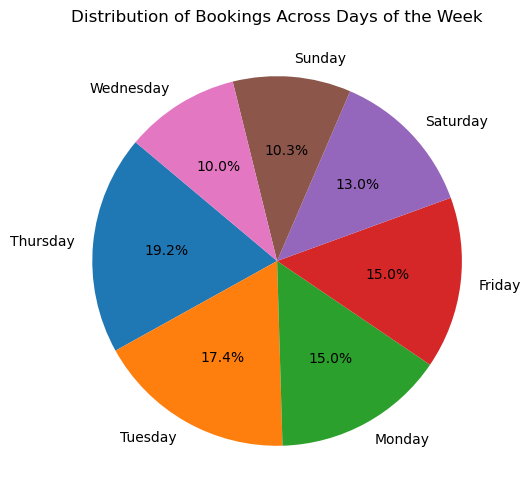

In [135]:
# Identify the day(s) with the highest number of bookings
max_day = day_counts.idxmax()
max_count = day_counts.max()

# Plot a pie chart
plt.figure(figsize=(8, 6))
day_counts.plot.pie(autopct='%1.1f%%', startangle=140, labels=day_counts.index)
plt.title("Distribution of Bookings Across Days of the Week")
plt.ylabel('')  # Hide the y-label for aesthetics
plt.show()

In [136]:
print(f"The day with the highest number of bookings is {max_day} with {max_count} bookings.")

The day with the highest number of bookings is Thursday with 65 bookings.


### 4. For each of the service names, display the total number of bookings and the total Gross Booking Value in INR.

In [138]:
bookings_data.groupby('service_name')['booking_id'].count().sort_values(ascending=False)


service_name
GOIBIBO    186
YATRA      105
MMT         48
Name: booking_id, dtype: int64

In [139]:
bookings_data.groupby('service_name')['INR_Amount'].sum().sort_values(ascending=False)

service_name
GOIBIBO    5897637.97
YATRA      3378702.13
MMT         665669.08
Name: INR_Amount, dtype: float64

In [140]:
# Group by service_name and calculate required aggregates
service_summary = bookings_data.groupby('service_name').agg(
    total_bookings=('booking_id', 'count'),     # Count of bookings
    total_gross_value=('INR_Amount', 'sum')    # Sum of Gross Booking Value
).reset_index()

# Display the result
print(service_summary)


  service_name  total_bookings  total_gross_value
0      GOIBIBO             186         5897637.97
1          MMT              48          665669.08
2        YATRA             105         3378702.13


### 5.   For customers who have more than 1 booking, which is the most booked route (from_city to to_city)?

In [142]:
# Count the number of bookings per customer
customer_booking_count= bookings_data.groupby('customer_id')['booking_id'].count()
customer_booking_count

customer_id
customer_0      1
customer_1      1
customer_10     1
customer_100    1
customer_101    1
               ..
customer_95     1
customer_96     1
customer_97     4
customer_98     1
customer_99     1
Name: booking_id, Length: 306, dtype: int64

In [143]:
# Filter customers who have more than 1 booking
customers_with_multiple_bookings=customer_booking_count[customer_booking_count>1].index
customers_with_multiple_bookings

Index(['customer_120', 'customer_137', 'customer_144', 'customer_155',
       'customer_160', 'customer_176', 'customer_179', 'customer_200',
       'customer_217', 'customer_230', 'customer_235', 'customer_237',
       'customer_245', 'customer_246', 'customer_247', 'customer_255',
       'customer_265', 'customer_28', 'customer_282', 'customer_297',
       'customer_33', 'customer_44', 'customer_49', 'customer_67',
       'customer_93', 'customer_97'],
      dtype='object', name='customer_id')

In [144]:
# Filter the original dataframe for these customers
filtered_data = bookings_data[bookings_data['customer_id'].isin(customers_with_multiple_bookings)]

In [145]:
route_counts = filtered_data.groupby(['customer_id', 'from_city', 'to_city']).agg(
    total_bookings=('booking_id', 'count')
).reset_index()



In [146]:
#  For each customer, find the most booked route
most_booked_routes = route_counts.loc[route_counts.groupby('customer_id')['total_bookings'].idxmax()]

# Find the most common route overall
most_common_route = most_booked_routes.groupby(['from_city', 'to_city']).agg(
    total_customers=('customer_id', 'count')
).reset_index()

# Identify the route with the maximum number of customers
most_common_route = most_common_route.loc[most_common_route['total_customers'].idxmax()]

# Display the result
print(most_common_route)

from_city                   Gurgaon
to_city            Roissy-en-France
total_customers                   2
Name: 18, dtype: object


In [147]:
print(f"The most common route is from {most_common_route['from_city']} to {most_common_route['to_city']}")

The most common route is from Gurgaon to Roissy-en-France


### 6.  Which are the top 3 departure cities from where customers book mostly in advance, provided that there have been at least 5 departures from that city?

In [149]:
city_booking_advance= bookings_data.groupby('from_city').agg(total_departures=('booking_id', 'count'),
        avg_days_to_departure=('days_to_departure', 'mean')
    ).reset_index()


In [150]:
#  Filter cities with at least 5 departures
city_booking_advance_filtered = city_booking_advance[city_booking_advance['total_departures']>=5]
city_booking_advance_filtered

,from_city,total_departures,avg_days_to_departure
1,Ahmedabad,8,11.750000
7,Bālāpur,6,46.166667
8,Chennai,16,26.187500
10,Delhi,29,12.758621
11,Devanhalli,24,29.583333
16,Gurgaon,136,26.176471
25,Madhyamgram,6,15.000000
27,Mumbai,34,21.764706
29,New Delhi,7,21.285714
33,Rāja Sānsi,17,8.823529


In [151]:
#  Sort by average 'days_to_departure' in descending order
city_booking_advance_sorted = city_booking_advance_filtered.sort_values(by='avg_days_to_departure', ascending=False)
city_booking_advance_sorted

,from_city,total_departures,avg_days_to_departure
7,Bālāpur,6,46.166667
11,Devanhalli,24,29.583333
8,Chennai,16,26.187500
16,Gurgaon,136,26.176471
27,Mumbai,34,21.764706
29,New Delhi,7,21.285714
25,Madhyamgram,6,15.000000
10,Delhi,29,12.758621
1,Ahmedabad,8,11.750000
33,Rāja Sānsi,17,8.823529


In [152]:
# Retrieve the top 3 cities
top_3_departure_cities = city_booking_advance_sorted.head(3)

# Display the result
print(top_3_departure_cities)

     from_city  total_departures  avg_days_to_departure
7      Bālāpur                 6              46.166667
11  Devanhalli                24              29.583333
8      Chennai                16              26.187500


###  7. Plot a heatmap displaying correlations of the numerical column and report which pair of numerical columns in the bookings data set, have the maximum correlation?

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt
# Extract numerical columns
numerical_bookings_data= bookings_data.select_dtypes(include=['float64', 'int64'])
numerical_bookings_data.head(10)

,INR_Amount,no_of_passengers,days_to_departure,distance_km
0,2565.28,1.0,10.0,747.8
1,23120.00,1.0,1.0,6701.5
2,25717.60,1.0,32.0,7712.0
3,135969.60,2.0,69.0,6112.5
4,31791.20,1.0,3.0,6570.4
5,21843.20,1.0,11.0,6570.4
6,13442.40,1.0,13.0,1310.7
7,4352.00,2.0,47.0,260.5
8,64316.80,1.0,86.0,6354.9
9,47974.93,1.0,17.0,6275.7


In [155]:
# Compute the correlation matrix
correlation_matrix= numerical_bookings_data.corr()
correlation_matrix

,INR_Amount,no_of_passengers,days_to_departure,distance_km
INR_Amount,1.000000,0.397229,0.284534,0.623565
no_of_passengers,0.397229,1.000000,0.187128,0.001698
days_to_departure,0.284534,0.187128,1.000000,0.216972
distance_km,0.623565,0.001698,0.216972,1.000000


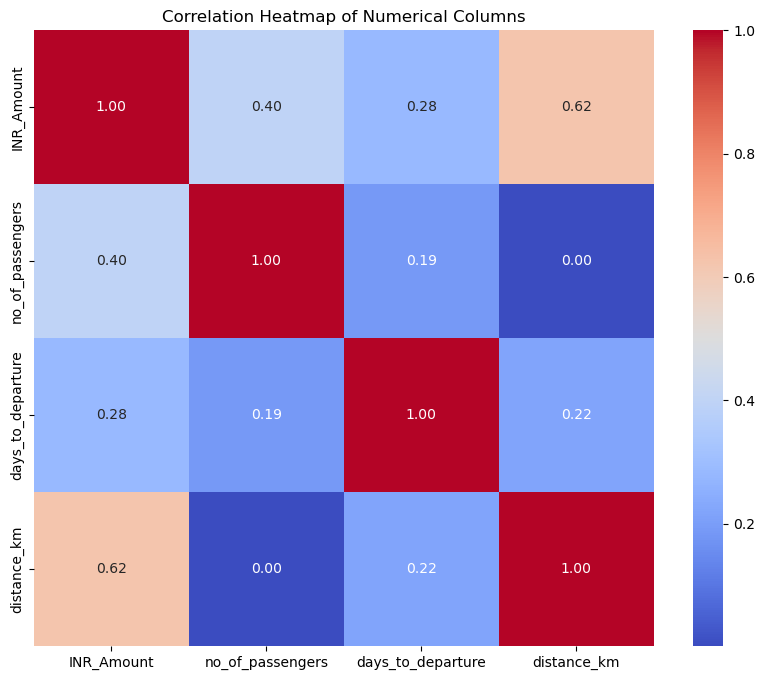

In [156]:
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

In [157]:
# Find the pair with the maximum correlation (excluding 1.0)
correlation_matrix_unstacked = correlation_matrix.unstack()
correlation_matrix_unstacked = correlation_matrix_unstacked[correlation_matrix_unstacked < 1.0]
max_correlation_pair = correlation_matrix_unstacked.idxmax()
max_correlation_value = correlation_matrix_unstacked.max()

In [158]:
print(f"The pair of columns with the highest correlation: {max_correlation_pair}")
print(f"Maximum correlation value: {max_correlation_value:.2f}")

The pair of columns with the highest correlation: ('INR_Amount', 'distance_km')
Maximum correlation value: 0.62


### 8. For each service, which is the most used device type for making bookings on the platform?

In [160]:
device_counts = bookings_data.groupby('service_name')['device_type_used'].value_counts().reset_index()
print(device_counts)


   service_name device_type_used  count
0       GOIBIBO              IOS     70
1       GOIBIBO          Desktop     61
2       GOIBIBO          Android     44
3       GOIBIBO        MobileWeb     11
4           MMT          Desktop     30
5           MMT          Android      8
6           MMT              IOS      5
7           MMT        MobileWeb      5
8         YATRA          Desktop     51
9         YATRA              IOS     22
10        YATRA          Android     18
11        YATRA        MobileWeb     11
12        YATRA           Tablet      3


In [161]:
top_devices = device_counts.loc[device_counts.groupby('service_name')['count'].idxmax()]
top_devices

,service_name,device_type_used,count
0,GOIBIBO,IOS,70
4,MMT,Desktop,30
8,YATRA,Desktop,51


In [162]:
for _,row in top_devices.iterrows():
    print(f"Service {row['service_name']}, Most Used device: {row['device_type_used']} ({row['count']} bookings)")

Service GOIBIBO, Most Used device: IOS (70 bookings)
Service MMT, Most Used device: Desktop (30 bookings)
Service YATRA, Most Used device: Desktop (51 bookings)


### 9.   Plot the trends at a quarterly frequency for the number of bookings by each of the device types, that is, plot a time series for each year and quarter showing the number of bookings performed by each device type.

In [164]:
bookings_data.dtypes

customer_id                       object
booking_id                        object
from_city                         object
from_country                      object
to_city                           object
to_country                        object
booking_time         datetime64[ns, UTC]
device_type_used                  object
INR_Amount                       float64
service_name                      object
no_of_passengers                 float64
days_to_departure                float64
distance_km                      float64
day_of_week                       object
dtype: object

In [165]:
bookings_data['year_quarter']= bookings_data['booking_time'].dt.to_period('Q')

C:\Users\user\AppData\Local\Temp\ipykernel_20736\4218458964.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  bookings_data['year_quarter']= bookings_data['booking_time'].dt.to_period('Q')


In [166]:
bookings_data.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,day_of_week,year_quarter
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,Wednesday,2020Q1
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,Wednesday,2018Q4
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,Monday,2019Q4
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,Friday,2021Q4
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,Tuesday,2020Q3


In [167]:
quarterly_device_counts= bookings_data.groupby('year_quarter')['device_type_used'].value_counts().reset_index()
quarterly_device_counts

,year_quarter,device_type_used,count
0,2018Q3,Desktop,6
1,2018Q3,Android,3
2,2018Q3,MobileWeb,2
3,2018Q3,Tablet,1
4,2018Q4,Desktop,22
5,2018Q4,IOS,4
6,2018Q4,MobileWeb,4
7,2018Q4,Android,3
8,2018Q4,Tablet,1
9,2019Q1,Desktop,1


In [168]:
quarterly_device_counts_pivot = quarterly_device_counts.pivot(index='year_quarter', columns='device_type_used', values='count')
quarterly_device_counts_pivot

device_type_used,Android,Desktop,IOS,MobileWeb,Tablet
year_quarter,,,,,
2018Q3,3.0,6.0,NaN,2.0,1.0
2018Q4,3.0,22.0,4.0,4.0,1.0
2019Q1,NaN,1.0,NaN,NaN,NaN
2019Q2,NaN,1.0,NaN,NaN,1.0
2019Q3,3.0,7.0,4.0,NaN,NaN
2019Q4,14.0,15.0,14.0,NaN,NaN
2020Q1,19.0,29.0,25.0,10.0,NaN
2020Q2,2.0,NaN,NaN,NaN,NaN
2020Q3,3.0,NaN,4.0,NaN,NaN


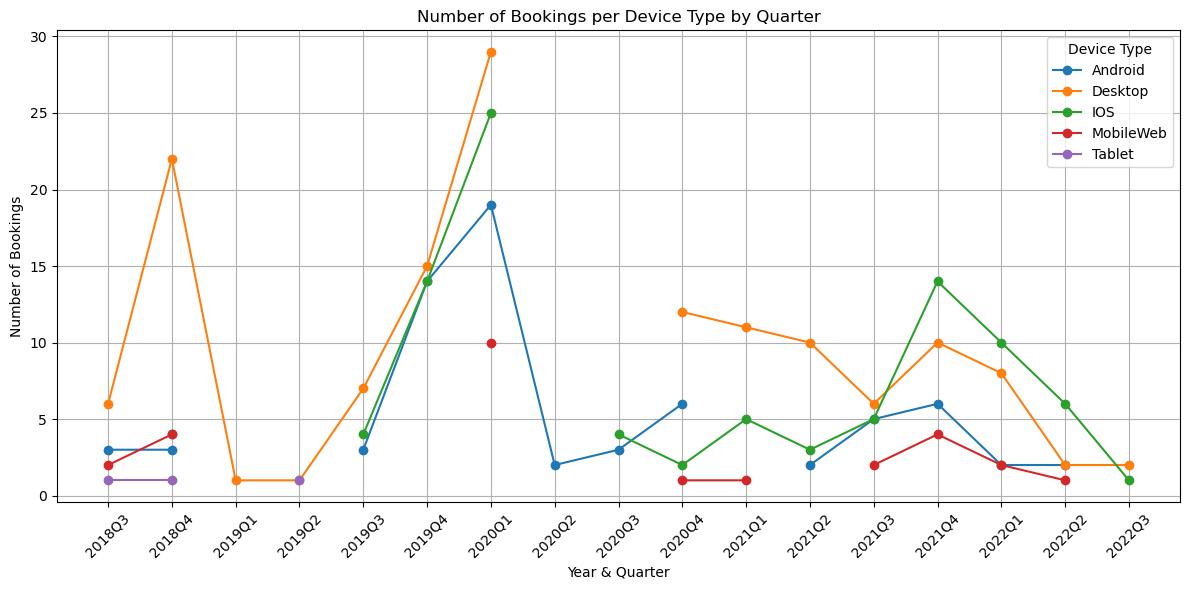

In [169]:
# Convert 'year_quarter' to string for proper labeling
quarterly_device_counts['year_quarter'] = quarterly_device_counts['year_quarter'].astype(str)

# Pivot the data for plotting
quarterly_device_counts_pivot = quarterly_device_counts.pivot(index='year_quarter', columns='device_type_used', values='count')

# Plot the trends by device type
quarterly_device_counts_pivot.plot(kind='line', marker='o', figsize=(12, 6))

# Customize the plot
plt.title('Number of Bookings per Device Type by Quarter')
plt.xlabel('Year & Quarter')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=range(len(quarterly_device_counts_pivot.index)), labels=quarterly_device_counts_pivot.index, rotation=45)  # Use year and quarter labels
plt.legend(title='Device Type')
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()


### 10.What is the average oBSR for each month of the year?

In [171]:
book_session_data['month_year']= book_session_data['booking_time'].dt.to_period('M')

C:\Users\user\AppData\Local\Temp\ipykernel_20736\718096440.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  book_session_data['month_year']= book_session_data['booking_time'].dt.to_period('M')


In [172]:
book_session_data.head()

,customer_id,booking_id,from_city,from_country,to_city,to_country,booking_time,device_type_used,INR_Amount,service_name,no_of_passengers,days_to_departure,distance_km,session_id,search_id,search_time,session_starting_time,month_year
0,customer_259,booking_82,Gurgaon,India,Ahmedabad,India,2020-02-05 16:12:08+00:00,Desktop,2565.28,MMT,1.0,10.0,747.8,session_231,search_439,2020-02-05 16:10:42.982000+00:00,2020-02-05 16:00:20.320000+00:00,2020-02
1,customer_303,booking_156,Delhi,India,Brussels,Belgium,2018-11-21 08:21:47+00:00,Android,23120.00,YATRA,1.0,1.0,6701.5,session_146,search_1304,2018-11-21 08:15:39.448000+00:00,2018-11-21 07:30:07+00:00,2018-11
2,customer_203,booking_99,Devanhalli,India,Frankfurt am Main,Germany,2019-12-16 22:54:58+00:00,Android,25717.60,YATRA,1.0,32.0,7712.0,session_202,search_186,2019-12-16 22:51:29.184000+00:00,2019-12-16 22:45:33+00:00,2019-12
3,customer_211,booking_319,Gurgaon,India,Frankfurt am Main,Germany,2021-10-29 12:25:38+00:00,Desktop,135969.60,GOIBIBO,2.0,69.0,6112.5,session_239,search_539,2021-10-29 12:12:15+00:00,2021-10-29 10:52:23.691000+00:00,2021-10
4,customer_287,booking_222,Gurgaon,India,Roissy-en-France,France,2020-08-11 16:09:10+00:00,Android,31791.20,GOIBIBO,1.0,3.0,6570.4,session_312,search_546,2020-08-11 16:02:32+00:00,2020-08-11 16:02:20+00:00,2020-08


In [173]:
monthly_data = book_session_data.groupby('month_year').agg({'booking_id': 'count', 'search_id': 'count'}).reset_index()
monthly_data 

,month_year,booking_id,search_id
0,2018-09,12,12
1,2018-10,18,18
2,2018-11,10,10
3,2018-12,6,6
4,2019-01,1,1
5,2019-06,2,2
6,2019-07,5,5
7,2019-08,2,2
8,2019-09,7,7
9,2019-10,9,9


In [174]:
# Calculate oBSR for each month
monthly_data['oBSR'] = monthly_data['booking_id'] / monthly_data['search_id']
monthly_data

,month_year,booking_id,search_id,oBSR
0,2018-09,12,12,1.00
1,2018-10,18,18,1.00
2,2018-11,10,10,1.00
3,2018-12,6,6,1.00
4,2019-01,1,1,1.00
5,2019-06,2,2,1.00
6,2019-07,5,5,1.00
7,2019-08,2,2,1.00
8,2019-09,7,7,1.00
9,2019-10,9,9,1.00


In [175]:
avg_obsr_monthly= monthly_data['oBSR'].mean()

In [176]:
print("Average oBSR for each month:", avg_obsr_monthly)

Average oBSR for each month: 1.000952380952381


### 10b) What is the average oBSR for Each Day of the Week

In [178]:
book_session_data['day_week']= book_session_data['booking_time'].dt.day_name()

In [179]:
weekly_data = book_session_data.groupby('day_week').agg({'booking_id': 'count', 'search_id': 'count'}).reset_index()
weekly_data 

,day_week,booking_id,search_id
0,Friday,51,51
1,Monday,51,51
2,Saturday,45,45
3,Sunday,35,35
4,Thursday,65,65
5,Tuesday,59,58
6,Wednesday,34,34


In [180]:
# Calculate oBSR for each day of the week
weekly_data['oBSR'] = weekly_data['booking_id'] / weekly_data['search_id']

# Print the oBSR for each day
print("oBSR for each day of the week:")
print(weekly_data[['day_week', 'oBSR']])

oBSR for each day of the week:
    day_week      oBSR
0     Friday  1.000000
1     Monday  1.000000
2   Saturday  1.000000
3     Sunday  1.000000
4   Thursday  1.000000
5    Tuesday  1.017241
6  Wednesday  1.000000


In [181]:
book_session_data['date'] = book_session_data['booking_time'].dt.date

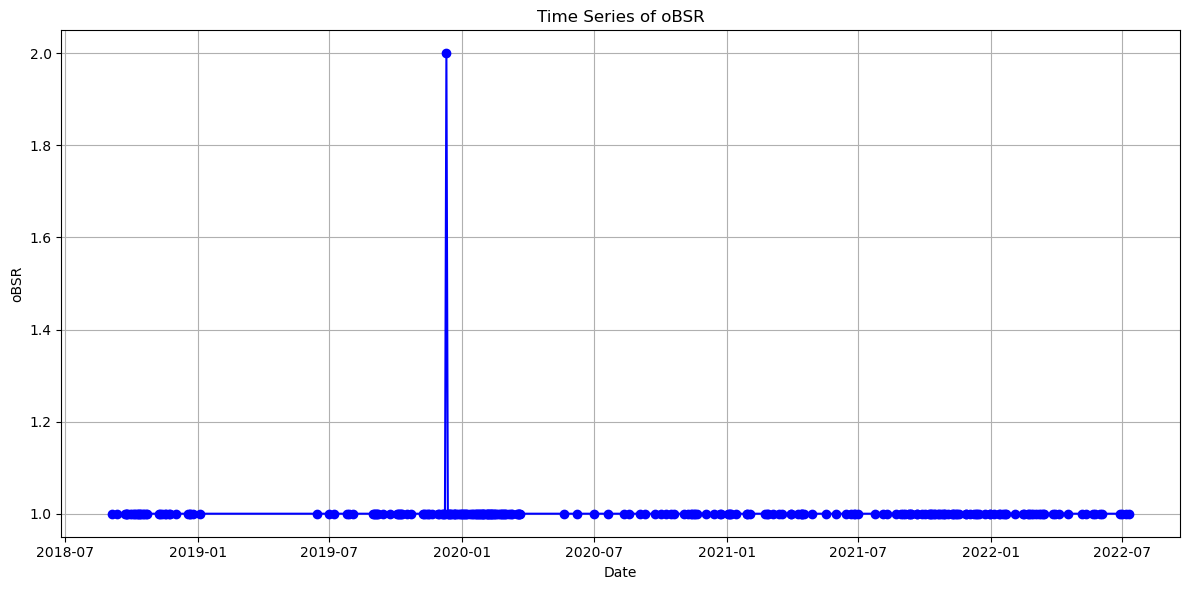

In [182]:
# Group by date and calculate total searches and bookings
daily_data = book_session_data.groupby('date').agg({'booking_id': 'count', 'search_id': 'count'}).reset_index()

# Calculate oBSR for each date
daily_data['oBSR'] = daily_data['booking_id'] / daily_data['search_id']

# Plot the time series
plt.figure(figsize=(12, 6))
plt.plot(daily_data['date'], daily_data['oBSR'], marker='o', linestyle='-', color='b')
plt.title("Time Series of oBSR")
plt.xlabel("Date")
plt.ylabel("oBSR")
plt.grid(True)
plt.tight_layout()
plt.show()
